In the Exploratory Data Analysis our goal is to understand the data, identify patterns, and gain meaningful insights.
We will try to gather some relationships between different features of the scraped dataset.

In [1]:
# importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("raw_data.csv")

# Top brands having the highest revenue.

Here we are considering that the number of reviews is the number of people who actually bought that watch.

In [2]:
df["Revenue"] = df.Price * df.Reviews

In [3]:
# creating brand wise net-revenue
brand_profit = pd.DataFrame(df.groupby('Brand')['Revenue'].sum())
brand_profit = brand_profit.sort_values('Revenue',ascending=False)

In [4]:
# data frame which consists features as Brands and its total Revenue
a = {'Brands': list(brand_profit.index), 'Revenue':brand_profit.values.ravel()}
df1 = pd.DataFrame(a)

In [5]:
df1

,Brands,Revenue
0,Fossil,118881758.0
1,Casio,103045994.0
2,Titan,99684883.0
3,Fastrack,85820748.0
4,TIMEX,35974335.0
5,Sonata,30070004.0
6,GUESS,25451056.0
7,TIMEWEAR,21525230.0
8,Michael,20798890.0
9,Timex,18148641.0


Plotting the top 7 brands with the highest revenue.

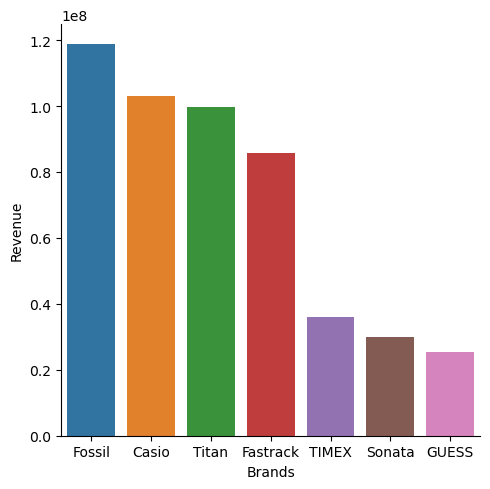

In [6]:
sns.catplot(x="Brands",y='Revenue',data=df1[:7],kind="bar")
plt.show()

Fossil is the brand with highest revenue, followed by Casio,Titan,Fastrack etc.

# Brands with highest number of sales.

In [7]:
# creating brand wise total sales data frame.
brand_sales = df.groupby('Brand')['Reviews'].sum()
total_sales = brand_sales.values
all_brands = brand_sales.keys()
brand_sales = pd.DataFrame({'Brand':list(all_brands), "Sales":total_sales})

In [8]:
# arranging the sales in decending order
brand_sales = brand_sales.sort_values('Sales',ascending=False)

In [9]:
brand_sales

,Brand,Sales
11,Fastrack,60138
35,TIMEWEAR,54410
38,Titan,34387
33,Sonata,31192
36,TIMEX,22927
6,Casio,17398
27,SF,13662
12,Fossil,12298
9,Espoir,11611
0,Acnos,11238


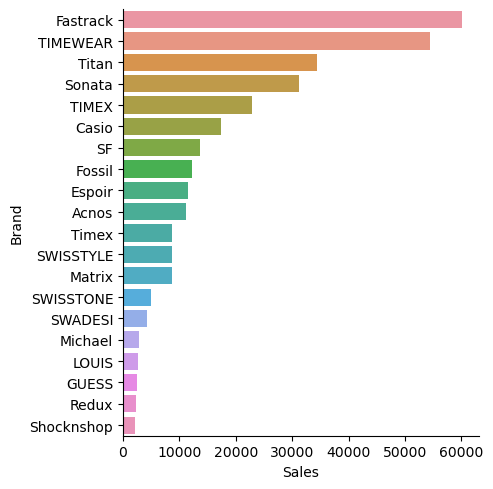

In [10]:
# plotting brand wise sales.
sns.catplot(y="Brand",x='Sales',data=brand_sales[:20],kind="bar")
plt.show()

The most selling brand is Fastrack, followed by TIMEWEAR, Titan etc.

# Plotting the most frequent ratings given to the watches.

Using histogram for the same. 

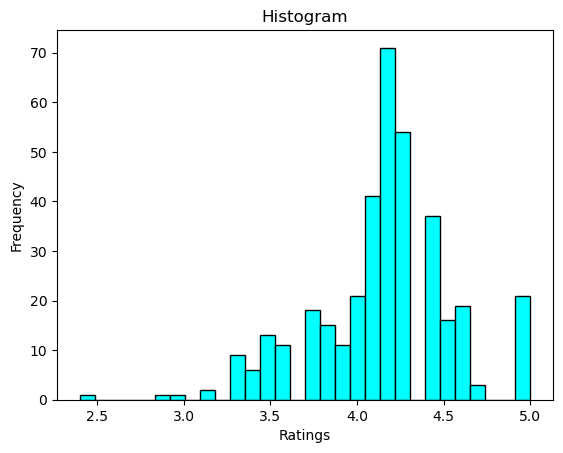

In [11]:
plt.hist(df.Ratings,bins=30,edgecolor='black',color='cyan')
plt.xlabel('Ratings')
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()


Most of the watches recieve a rating of about 4.3/5

# Most frequent price for watches listed on amazon

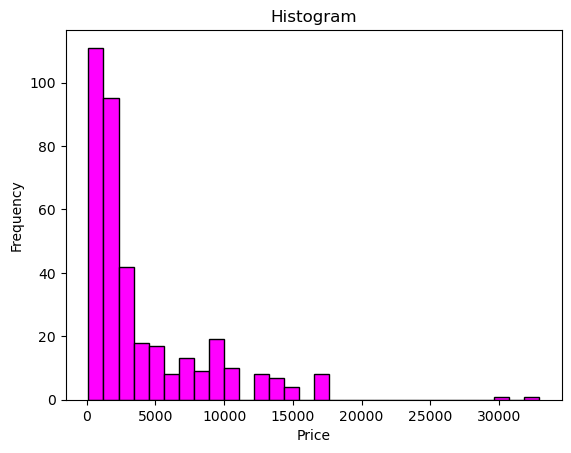

In [12]:
# plotting histogram with price
plt.hist(df.Price,bins=30,edgecolor='black',color='magenta')
plt.xlabel('Price')
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()
plt.show()

# Relationship between Price and Ratings.

For this we use relationship plot from seaborn.

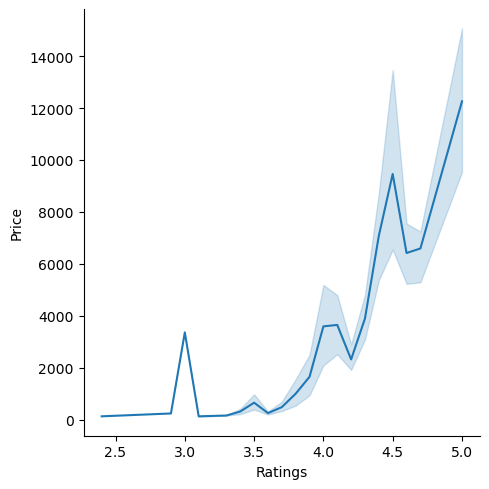

In [13]:
sns.relplot(y='Price',x='Ratings',data = df,kind='line')
plt.show()

For the highest price, the ratings are good but the relationship is NOT linear, that means some watches have good rating even if their price is less and vice versa.

# Most selling watch models.

In [14]:
# most selling watches
df_ = df.sort_values('Reviews',ascending=False)

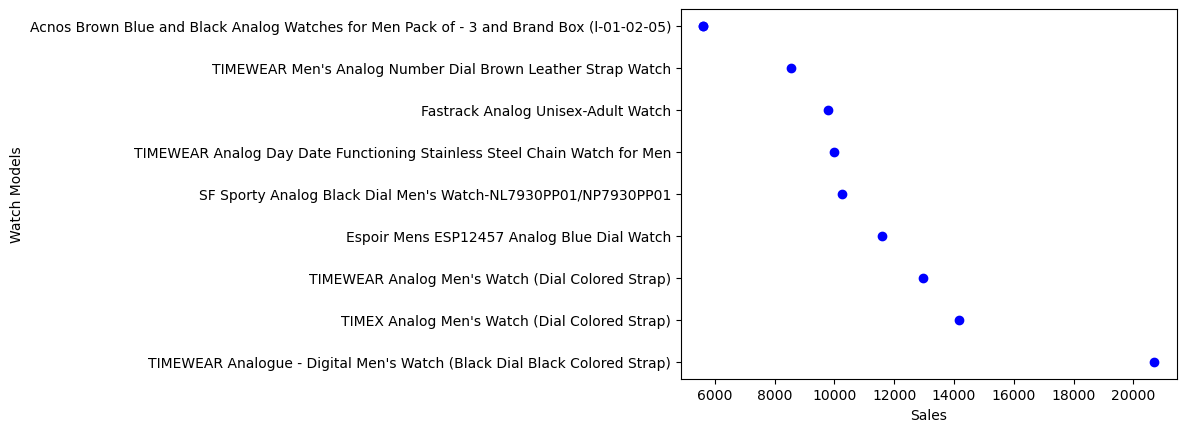

In [15]:
plt.scatter(list(df_.Reviews[:10]),list(df_.Title[:10]),color='blue')
plt.xlabel("Sales")
plt.ylabel('Watch Models')
plt.show()

From this we can observe that the most selling Watch is TIMEWEAR Analogue. We can also see that 4 out of 10 most selling watches are of TIMEWEAR Brand.

# The final conclusion from the whole analysis is-

- # Fossil is the most revenue generating brand
- # Fastrack is the most selling brand
- # Mode value of ratings (for watches) is approx 4.3
- # Higher price of a watch is not completely implying higher rating.
- # 4/10 Top selling watch models are produced by TIMEWEAR